#### Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
#importing common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
#loading data
df = pd.read_excel(r"C:\Users\Siddhant Sonawane\Downloads\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
#describe
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
#checking null values
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

There are no null values present in the data.

In [6]:
#checking duplicates
df.duplicated().sum()

0

There are no duplicates present in the data.

#### Feature Extraction 

In [7]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
df.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [9]:
# converting into datetime formate as the index was not in correct formate.
df['Date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [10]:
#extracting quarters from data
df['Quarters'] = 0
for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i]=n[0:2]

df.head(10)

C:\Users\Siddhant Sonawane\AppData\Local\Temp\ipykernel_5788\1893699068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i]=n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [11]:
df1=pd.get_dummies(df,columns=['Quarters'])

In [12]:
#making separate feature of month and year to get more insights.
df1["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df1["month"] = df1.Date.dt.strftime("%b") # month extraction
df1["year"] = df1.Date.dt.strftime("%Y") # year extraction
df1.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,1,0,0,0,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,0,1,0,0,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,0,0,1,0,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,0,0,0,1,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,1,0,0,0,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,0,1,0,0,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,0,0,1,0,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,0,0,0,1,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,1,0,0,0,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,0,1,0,0,Apr,1988


In [13]:
#dropping unnecessary columns
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,month,year
0,1734.827000,1986-01-01,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,1,0,0,0,Jan,1987


#### Data Visualization

<AxesSubplot:xlabel='month', ylabel='year'>

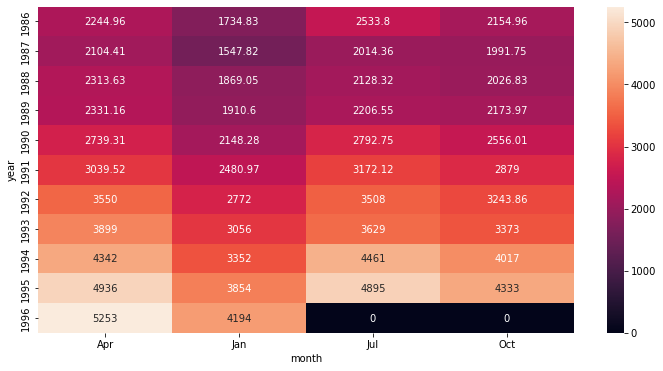

In [14]:
plt.figure(figsize=(12,6))
heatmap_y_month = pd.pivot_table(data=df1,values='Sales',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

<AxesSubplot:>

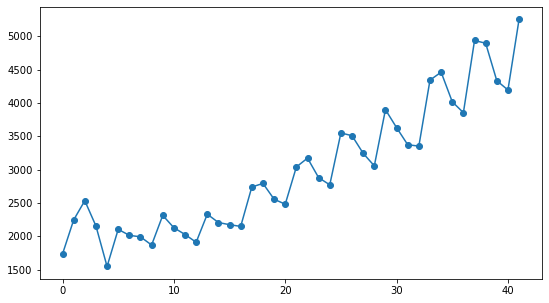

In [15]:
#plotting 
plt.figure(figsize=(9,5))
df1.Sales.plot(marker='o')

*From the above graph we can see that the data is non-stationary because of the presence of upward trend and probably there is seasonality present in some quarters of every year.

<AxesSubplot:xlabel='year', ylabel='Sales'>

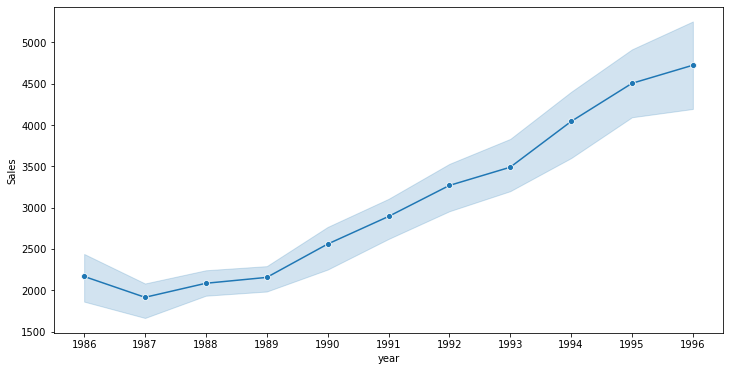

In [16]:
#Sales with respect to year
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Sales',data=df1,marker='o')

<AxesSubplot:xlabel='month', ylabel='Sales'>

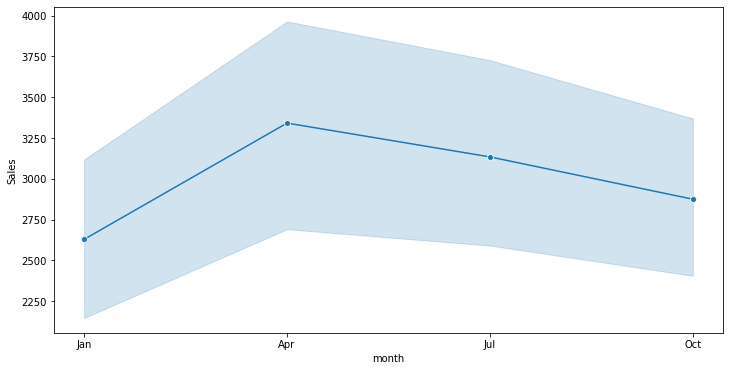

In [17]:
#sales with respect to month
plt.figure(figsize=(12,6))
sns.lineplot(x='month',y='Sales',data=df1,marker='o')

*From the above plot we can see that,Sales of cocacola is high in the April month.

<AxesSubplot:>

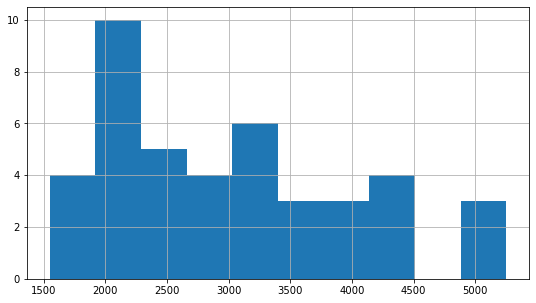

In [18]:
#plotting histogram of Sales
plt.figure(figsize=(9,5))
df1.Sales.hist()

*Above graph represents distribution of Sales which is not normally distributed.

<AxesSubplot:ylabel='Density'>

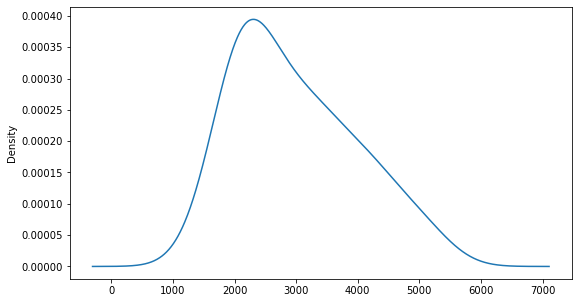

In [19]:
#density plot of sales
plt.figure(figsize=(9,5))
df1.Sales.plot(kind='kde')

<AxesSubplot:xlabel='year', ylabel='Sales'>

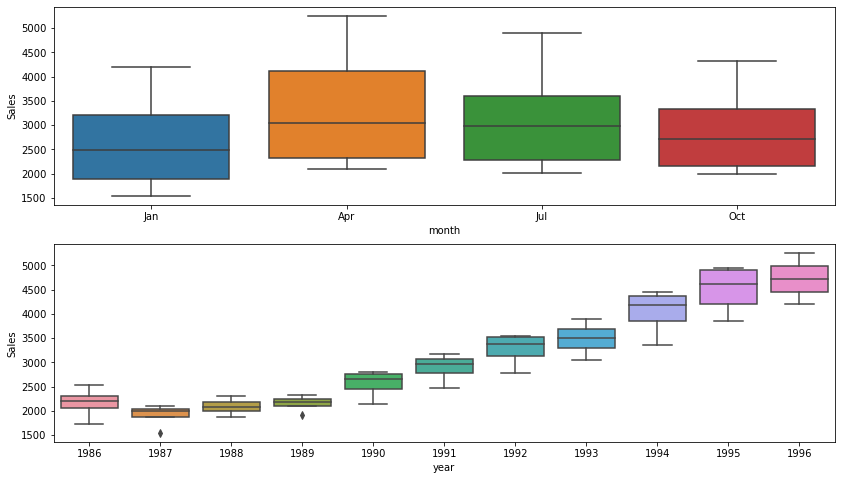

In [20]:
#boxplot
# Boxplot for ever
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=df1)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df1)

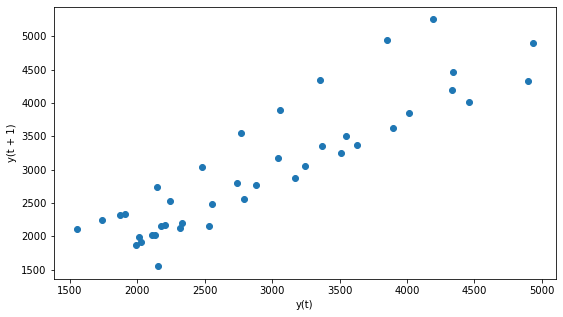

In [21]:
#lag plot  # TO check colinearity 
from pandas.plotting import lag_plot
plt.figure(figsize=(9,5))
lag_plot(df1.Sales)
plt.show()

From the above plot it is clear that data points has linear relationship with its lagged data points.
autocorrelation is present in the data.
as the linear relation is in the postive direction,positive autocorrelation present in the data.

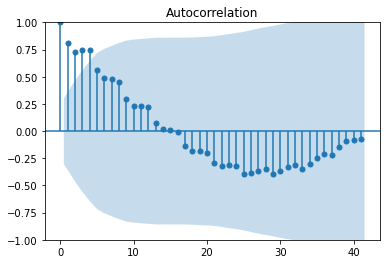

In [22]:
#Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=df1['Sales'],lags=41,title='Autocorrelation')
plt.show()

### Sampling

In [23]:
#setting Date as index
df1.set_index('Date',inplace=True)
df1.head()

,Sales,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,month,year
Date,,,,,,,
1986-01-01,1734.827000,1,0,0,0,Jan,1986
1986-04-01,2244.960999,0,1,0,0,Apr,1986
1986-07-01,2533.804993,0,0,1,0,Jul,1986
1986-10-01,2154.962997,0,0,0,1,Oct,1986
1987-01-01,1547.818996,1,0,0,0,Jan,1987


In [24]:
df1.columns

Index(['Sales', 'Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3', 'Quarters_Q4',
       'month', 'year'],
      dtype='object')

In [25]:
#linear-interpolation
res_month = df1.drop(['Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3', 'Quarters_Q4'],axis=1)
res_month = res_month.resample('M').mean()
res_month.head(20)

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN
1986-06-30,NaN
1986-07-31,2533.804993
1986-08-31,NaN
1986-09-30,NaN


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996
1987-02-28  1733.349996
1987-03-31  1918.880995


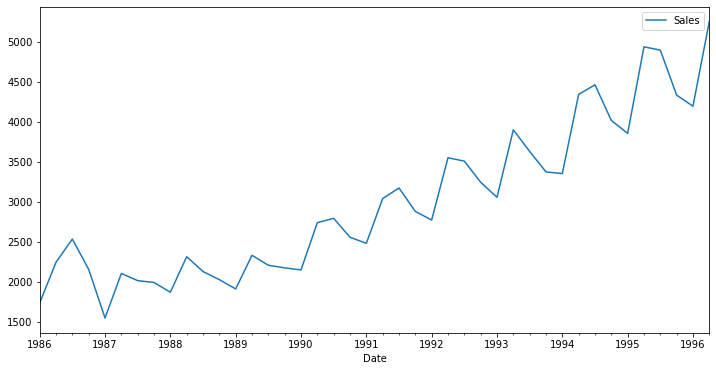

In [26]:
int_month = res_month.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(int_month.head(15))
int_month.plot(figsize=(12,6))
plt.show()

In [27]:
int_month

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [28]:
int_month['t'] = np.arange(1,125)
int_month['t_square'] = int_month['t']**2
int_month

,Sales,t,t_square
Date,,,
1986-01-31,1734.827000,1,1
1986-02-28,1904.871666,2,4
1986-03-31,2074.916332,3,9
1986-04-30,2244.960999,4,16
1986-05-31,2341.242330,5,25
...,...,...,...
1995-12-31,4240.333333,120,14400
1996-01-31,4194.000000,121,14641
1996-02-29,4547.000000,122,14884


In [29]:
int_month['log_Sales']=np.log(int_month['Sales'])
int_month

,Sales,t,t_square,log_Sales
Date,,,,
1986-01-31,1734.827000,1,1,7.458663
1986-02-28,1904.871666,2,4,7.552170
1986-03-31,2074.916332,3,9,7.637676
1986-04-30,2244.960999,4,16,7.716443
1986-05-31,2341.242330,5,25,7.758437
...,...,...,...,...
1995-12-31,4240.333333,120,14400,8.352397
1996-01-31,4194.000000,121,14641,8.341410
1996-02-29,4547.000000,122,14884,8.422223


In [30]:
#month and year
int_month.reset_index(inplace=True)
int_month["month"] = int_month.Date.dt.strftime("%b") # month extraction
int_month["year"] = int_month.Date.dt.strftime("%Y") # year extraction
int_month.head()

,Date,Sales,t,t_square,log_Sales,month,year
0,1986-01-31,1734.827000,1,1,7.458663,Jan,1986
1,1986-02-28,1904.871666,2,4,7.552170,Feb,1986
2,1986-03-31,2074.916332,3,9,7.637676,Mar,1986
3,1986-04-30,2244.960999,4,16,7.716443,Apr,1986
4,1986-05-31,2341.242330,5,25,7.758437,May,1986


In [31]:
int_month1=int_month.drop('log_Sales',axis=1)
int_month1.head(2)

,Date,Sales,t,t_square,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986


In [32]:
months = pd.get_dummies(int_month1['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([int_month1,months],axis=1)
cocacola['log_Sales'] = np.log(cocacola['Sales'])
cocacola

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


<AxesSubplot:xlabel='month', ylabel='year'>

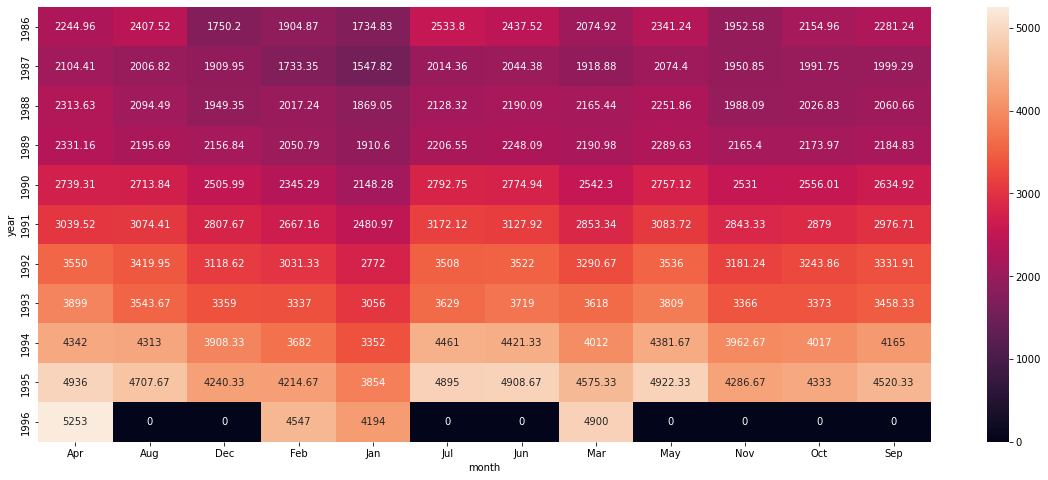

In [33]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

#### Splitting data into Train and Test
70% of data into Train data and rest for Test Data

In [34]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [35]:
train_data

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1993-12-31,3359.000000,96,9216,Dec,1993,0,0,0,0,0,0,0,0,0,0,0,1,8.119399
96,1994-01-31,3352.000000,97,9409,Jan,1994,1,0,0,0,0,0,0,0,0,0,0,0,8.117312
97,1994-02-28,3682.000000,98,9604,Feb,1994,0,1,0,0,0,0,0,0,0,0,0,0,8.211211
98,1994-03-31,4012.000000,99,9801,Mar,1994,0,0,1,0,0,0,0,0,0,0,0,0,8.297045


In [36]:
test_data

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_Sales
100,1994-05-31,4381.666667,101,10201,May,1994,0,0,0,0,1,0,0,0,0,0,0,0,8.385184
101,1994-06-30,4421.333333,102,10404,Jun,1994,0,0,0,0,0,1,0,0,0,0,0,0,8.394197
102,1994-07-31,4461.000000,103,10609,Jul,1994,0,0,0,0,0,0,1,0,0,0,0,0,8.403128
103,1994-08-31,4313.000000,104,10816,Aug,1994,0,0,0,0,0,0,0,1,0,0,0,0,8.369389
104,1994-09-30,4165.000000,105,11025,Sep,1994,0,0,0,0,0,0,0,0,1,0,0,0,8.334472
105,1994-10-31,4017.000000,106,11236,Oct,1994,0,0,0,0,0,0,0,0,0,1,0,0,8.298291
106,1994-11-30,3962.666667,107,11449,Nov,1994,0,0,0,0,0,0,0,0,0,0,1,0,8.284672
107,1994-12-31,3908.333333,108,11664,Dec,1994,0,0,0,0,0,0,0,0,0,0,0,1,8.270866
108,1995-01-31,3854.000000,109,11881,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,8.256867
109,1995-02-28,4214.666667,110,12100,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,8.346326


### Building Linear Model

In [37]:
#simple linear model
lr_model = smf.ols('Sales~t',data=train_data).fit()
pred_lr = pd.Series(lr_model.predict(pd.DataFrame(test_data['t'])))
rmse_lr = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_lr))**2))
rmse_lr

686.8740863668936

In [38]:
#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     397.1
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.03e-36
Time:                        11:37:47   Log-Likelihood:                -705.92
No. Observations:                 100   AIC:                             1416.
Df Residuals:                      98   BIC:                             1421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1642.3384     57.309     28.658      0.000    1528.611    1756.065
t             19.6334      0.985     19.928      0.000      17.678      21.589
==============================================================================
Omnibus:                        7.535   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.789
Skew:                           0.683   Prob(JB):                       0.0204
Kurtosis:                       2.929   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#exponential
exp_model = smf.ols('log_Sales~t',data=train_data).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_exp))**2))
rmse_exp

4461.558161779847

In [40]:
#summary
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.5
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.20e-36
Time:                        11:37:47   Log-Likelihood:                 84.607
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      98   BIC:                            -160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4782      0.021    353.829      0.000       7.436       7.520
t              0.0073      0.000     20.162      0.000       0.007       0.008
==============================================================================
Omnibus:                        6.147   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.627
Skew:                           0.561   Prob(JB):                       0.0600
Kurtosis:                       3.301   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Quadratic 
Quad_model = smf.ols('Sales~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad_model.predict(test_data[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.294183449867

In [42]:
#summary
Quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           9.85e-44
Time:                        11:37:47   Log-Likelihood:                -684.82
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      97   BIC:                             1383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2022.9480     70.858     28.549      0.000    1882.314    2163.582
t             -2.7554      3.238     -0.851      0.397      -9.183       3.672
t_square       0.2217      0.031      7.136      0.000       0.160       0.283
==============================================================================
Omnibus:                        3.492   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.371
Skew:                           0.193   Prob(JB):                        0.306
Kurtosis:                       2.352   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Additive seasonality 
add_sea_model = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483798

In [44]:
#summary
add_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.6210
Date:                Sat, 14 Jan 2023   Prob (F-statistic):              0.806
Time:                        11:37:47   Log-Likelihood:                -783.17
No. Observations:                 100   AIC:                             1590.
Df Residuals:                      88   BIC:                             1622.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2444.7012    229.752     10.641      0.000    1988.118    2901.284
Jan         -125.6398    315.763     -0.398      0.692    -753.153     501.874
Feb           85.1916    315.763      0.270      0.788    -542.322     712.705
Mar          296.0231    315.763      0.937      0.351    -331.490     923.536
Apr          506.8545    315.763      1.605      0.112    -120.659    1134.368
May          323.1701    324.918      0.995      0.323    -322.536     968.876
Jun          313.2912    324.918      0.964      0.338    -332.415     958.997
Jul          303.4123    324.918      0.934      0.353    -342.294     949.118
Aug          237.3486    324.918      0.730      0.467    -408.357     883.054
Sep          171.2848    324.918      0.527      0.599    -474.421     816.991
Oct          105.2211    324.918      0.324      0.747    -540.485     750.927
Nov           52.6105    324.918      0.162      0.872    -593.095     698.316
==============================================================================
Omnibus:                       30.612   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.038
Skew:                           0.459   Prob(JB):                       0.0109
Kurtosis:                       1.848   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Additive seasonality and linear trend
add_sea_lr_model = smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_lr = pd.Series(add_sea_lr_model.predict(test_data[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_lr = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_lr))**2))
rmse_add_sea_lr

613.8258293118299

In [46]:
#summary
add_sea_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     55.85
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.32e-35
Time:                        11:37:48   Log-Likelihood:                -678.72
No. Observations:                 100   AIC:                             1383.
Df Residuals:                      87   BIC:                             1417.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1374.7966     92.032     14.938      0.000    1191.874    1557.719
t             19.8130      0.798     24.813      0.000      18.226      21.400
Jan          -26.5746    111.815     -0.238      0.813    -248.819     195.670
Feb          164.4438    111.789      1.471      0.145     -57.750     386.637
Mar          355.4622    111.769      3.180      0.002     133.308     577.616
Apr          546.4806    111.755      4.890      0.000     324.355     768.606
May          461.8614    115.119      4.012      0.000     233.050     690.673
Jun          432.1695    115.083      3.755      0.000     203.429     660.910
Jul          402.4776    115.053      3.498      0.001     173.798     631.157
Aug          316.6008    115.028      2.752      0.007      87.971     545.231
Sep          230.7240    115.008      2.006      0.048       2.133     459.315
Oct          144.8472    114.994      1.260      0.211     -83.717     373.411
Nov           72.4236    114.986      0.630      0.530    -156.124     300.971
==============================================================================
Omnibus:                        7.554   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.174
Skew:                           0.634   Prob(JB):                       0.0277
Kurtosis:                       3.338   Cond. No.                         740.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Additive seasonality and Quadratic trend
add_sea_quad_model = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad_model.predict(test_data[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.80498810361917

In [48]:
add_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           8.95e-52
Time:                        11:37:48   Log-Likelihood:                -632.59
No. Observations:                 100   AIC:                             1293.
Df Residuals:                      86   BIC:                             1330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1776.3109     68.135     26.070      0.000    1640.862    1911.760
t             -2.9439      2.056     -1.432      0.156      -7.032       1.144
t_square       0.2253      0.020     11.418      0.000       0.186       0.265
Jan          -70.2860     71.007     -0.990      0.325    -211.444      70.872
Feb          121.1830     70.989      1.707      0.091     -19.938     262.304
Mar          312.2014     70.976      4.399      0.000     171.105     453.297
Apr          502.7692     70.969      7.084      0.000     361.687     643.851
May          461.8614     72.999      6.327      0.000     316.744     606.979
Jun          433.5214     72.976      5.941      0.000     288.449     578.594
Jul          404.7307     72.957      5.548      0.000     259.697     549.765
Aug          319.3046     72.941      4.378      0.000     174.302     464.307
Sep          233.4278     72.929      3.201      0.002      88.449     378.406
Oct          147.1003     72.920      2.017      0.047       2.140     292.061
Nov           73.7755     72.915      1.012      0.314     -71.174     218.725
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.611
Skew:                          -0.001   Prob(JB):                        0.737
Kurtosis:                       2.617   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#Multiplicative Seasonality
Mul_sea_model = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea_model.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.7944171920408

In [50]:
#summary
Mul_sea_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.6657
Date:                Sat, 14 Jan 2023   Prob (F-statistic):              0.767
Time:                        11:37:48   Log-Likelihood:                 6.6723
No. Observations:                 100   AIC:                             10.66
Df Residuals:                      88   BIC:                             41.92
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7756      0.085     91.146      0.000       7.606       7.945
Jan           -0.0590      0.117     -0.503      0.616      -0.292       0.174
Feb            0.0283      0.117      0.241      0.810      -0.205       0.261
Mar            0.1084      0.117      0.925      0.358      -0.125       0.341
Apr            0.1825      0.117      1.556      0.123      -0.051       0.415
May            0.1273      0.121      1.055      0.294      -0.112       0.367
Jun            0.1238      0.121      1.026      0.308      -0.116       0.364
Jul            0.1199      0.121      0.994      0.323      -0.120       0.360
Aug            0.0968      0.121      0.802      0.425      -0.143       0.337
Sep            0.0729      0.121      0.604      0.547      -0.167       0.313
Oct            0.0482      0.121      0.399      0.691      -0.192       0.288
Nov            0.0248      0.121      0.206      0.837      -0.215       0.265
==============================================================================
Omnibus:                       74.329   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.756
Skew:                           0.261   Prob(JB):                       0.0125
Kurtosis:                       1.648   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#multiplicative seasonality and linear trend
Mul_sea_lr_model = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_Mult_sea_lr = pd.Series(Mul_sea_lr_model.predict(test_data[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mult_sea_lr = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea_lr)))**2))
rmse_Mult_sea_lr

396.4197817374116

In [52]:
#summary
Mul_sea_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     61.10
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.29e-37
Time:                        11:37:48   Log-Likelihood:                 114.86
No. Observations:                 100   AIC:                            -203.7
Df Residuals:                      87   BIC:                            -169.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3763      0.033    224.075      0.000       7.311       7.442
t              0.0074      0.000     25.888      0.000       0.007       0.008
Jan           -0.0220      0.040     -0.550      0.584      -0.101       0.057
Feb            0.0579      0.040      1.447      0.152      -0.022       0.137
Mar            0.1306      0.040      3.266      0.002       0.051       0.210
Apr            0.1973      0.040      4.935      0.000       0.118       0.277
May            0.1790      0.041      4.348      0.000       0.097       0.261
Jun            0.1682      0.041      4.086      0.000       0.086       0.250
Jul            0.1569      0.041      3.812      0.000       0.075       0.239
Aug            0.1264      0.041      3.071      0.003       0.045       0.208
Sep            0.0951      0.041      2.311      0.023       0.013       0.177
Oct            0.0629      0.041      1.530      0.130      -0.019       0.145
Nov            0.0322      0.041      0.784      0.435      -0.050       0.114
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.352
Skew:                           0.801   Prob(JB):                     0.000171
Kurtosis:                       4.264   Cond. No.                         740.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#multiplicative seasonality and Quadratic trend
Mul_sea_quad_model = smf.ols('log_Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_Mult_sea_quad = pd.Series(Mul_sea_quad_model.predict(test_data[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_Mult_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_Mult_sea_quad)))**2))
rmse_Mult_sea_quad

642.2417571441132

In [54]:
#summary
Mul_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     99.74
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.79e-46
Time:                        11:37:48   Log-Likelihood:                 141.55
No. Observations:                 100   AIC:                            -255.1
Df Residuals:                      86   BIC:                            -218.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4953      0.030    253.204      0.000       7.436       7.554
t              0.0006      0.001      0.727      0.469      -0.001       0.002
t_square    6.677e-05   8.57e-06      7.788      0.000    4.97e-05    8.38e-05
Jan           -0.0350      0.031     -1.133      0.260      -0.096       0.026
Feb            0.0450      0.031      1.460      0.148      -0.016       0.106
Mar            0.1178      0.031      3.819      0.000       0.056       0.179
Apr            0.1843      0.031      5.978      0.000       0.123       0.246
May            0.1790      0.032      5.645      0.000       0.116       0.242
Jun            0.1686      0.032      5.317      0.000       0.106       0.232
Jul            0.1575      0.032      4.970      0.000       0.095       0.221
Aug            0.1272      0.032      4.012      0.000       0.064       0.190
Sep            0.0959      0.032      3.026      0.003       0.033       0.159
Oct            0.0636      0.032      2.008      0.048       0.001       0.127
Nov            0.0326      0.032      1.030      0.306      -0.030       0.096
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.060
Skew:                           0.250   Prob(JB):                        0.589
Kurtosis:                       3.058   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
#rmse result
data={'Model':pd.Series(['lr_model','exp_model','Quad_model','add_sea_model','add_sea_lr_model','add_sea_quad_model','Mul_sea_model','Mul_sea_lr_model','Mul_sea_quad_model']),'Rmse_values':pd.Series([rmse_lr,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lr,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_lr,rmse_Mult_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,Rmse_values
0,lr_model,686.874086
1,exp_model,4461.558162
2,Quad_model,371.294183
3,add_sea_model,1837.787972
4,add_sea_lr_model,613.825829
5,add_sea_quad_model,225.804988
6,Mul_sea_model,1904.794417
7,Mul_sea_lr_model,396.419782
8,Mul_sea_quad_model,642.241757


*Model with least rmse value is "add_sea_quad_model"

In [56]:
#model summary
add_sea_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           8.95e-52
Time:                        11:37:48   Log-Likelihood:                -632.59
No. Observations:                 100   AIC:                             1293.
Df Residuals:                      86   BIC:                             1330.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1776.3109     68.135     26.070      0.000    1640.862    1911.760
t             -2.9439      2.056     -1.432      0.156      -7.032       1.144
t_square       0.2253      0.020     11.418      0.000       0.186       0.265
Jan          -70.2860     71.007     -0.990      0.325    -211.444      70.872
Feb          121.1830     70.989      1.707      0.091     -19.938     262.304
Mar          312.2014     70.976      4.399      0.000     171.105     453.297
Apr          502.7692     70.969      7.084      0.000     361.687     643.851
May          461.8614     72.999      6.327      0.000     316.744     606.979
Jun          433.5214     72.976      5.941      0.000     288.449     578.594
Jul          404.7307     72.957      5.548      0.000     259.697     549.765
Aug          319.3046     72.941      4.378      0.000     174.302     464.307
Sep          233.4278     72.929      3.201      0.002      88.449     378.406
Oct          147.1003     72.920      2.017      0.047       2.140     292.061
Nov           73.7755     72.915      1.012      0.314     -71.174     218.725
==============================================================================
Omnibus:                        0.473   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.789   Jarque-Bera (JB):                0.611
Skew:                          -0.001   Prob(JB):                        0.737
Kurtosis:                       2.617   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#Building final model combine train and test data 
final_model = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=cocacola).fit()

In [58]:
#summary of final model
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     342.0
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.77e-82
Time:                        11:37:49   Log-Likelihood:                -792.75
No. Observations:                 124   AIC:                             1614.
Df Residuals:                     110   BIC:                             1653.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1685.8225     63.866     26.396      0.000    1559.255    1812.390
t              0.1763      1.561      0.113      0.910      -2.917       3.270
t_square       0.1936      0.012     15.998      0.000       0.170       0.218
Jan          -66.5574     67.189     -0.991      0.324    -199.711      66.596
Feb          146.8340     67.178      2.186      0.031      13.703     279.965
Mar          359.8383     67.170      5.357      0.000     226.722     492.954
Apr          572.4554     67.166      8.523      0.000     439.348     705.563
May          544.6801     68.730      7.925      0.000     408.474     680.886
Jun          516.1655     68.716      7.512      0.000     379.987     652.344
Jul          487.2637     68.704      7.092      0.000     351.109     623.419
Aug          376.8936     68.694      5.487      0.000     240.758     513.029
Sep          266.1363     68.687      3.875      0.000     130.016     402.257
Oct          154.9919     68.681      2.257      0.026      18.882     291.102
Nov           77.6895     68.678      1.131      0.260     -58.414     213.793
==============================================================================
Omnibus:                        1.888   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.703
Skew:                          -0.173   Prob(JB):                        0.427
Kurtosis:                       2.542   Cond. No.                     8.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""